In [1]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [2]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

In [3]:
#df25 = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_aug_sept_past2022_35_completed_qm.csv", parse_dates_col=[4,5,6])
df25 = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_aug_sept_past2022_25_completed_qm.csv", parse_dates_col=[4,5,6])

In [4]:
df25

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm16,qm17,qm18,qm19,qm20,qm21,qm22,qm23,qm24,qm25
0,10056839,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-08-01 00:03:34,2022-08-01 00:04:46,2022-08-01 00:43:43,48,1,120,...,0,0,0,0,0,0,0,0,0,0
1,10056840,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-08-01 00:03:35,2022-08-01 00:04:47,2022-08-01 00:43:20,48,1,120,...,0,0,0,0,0,0,0,0,0,0
2,10056841,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-08-01 00:03:35,2022-08-01 00:04:47,2022-08-01 00:48:53,48,1,120,...,0,0,0,0,0,0,0,0,0,0
3,10056842,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-08-01 00:03:36,2022-08-01 00:04:47,2022-08-01 00:46:10,48,1,120,...,0,0,0,0,0,0,0,0,0,0
4,10056843,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-08-01 00:03:37,2022-08-01 00:04:47,2022-08-01 00:42:33,48,1,120,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,10202512,350d51d0ac5acfacc4539962a6f1f3e3516dcc7f6d0bee...,c52ee554ca635b1e6ba534cdd5b178297dabd8904a9af2...,COMPLETED,2022-08-31 23:57:02,2022-08-31 23:59:33,2022-09-01 00:02:51,720,16,20,...,0,0,0,0,0,0,0,0,0,0
69797,10202513,350d51d0ac5acfacc4539962a6f1f3e3516dcc7f6d0bee...,c52ee554ca635b1e6ba534cdd5b178297dabd8904a9af2...,COMPLETED,2022-08-31 23:57:02,2022-08-31 23:59:38,2022-09-01 00:02:53,720,16,20,...,0,0,0,0,0,0,0,0,0,0
69798,10202514,350d51d0ac5acfacc4539962a6f1f3e3516dcc7f6d0bee...,c52ee554ca635b1e6ba534cdd5b178297dabd8904a9af2...,COMPLETED,2022-08-31 23:57:05,2022-08-31 23:59:38,2022-09-01 00:02:53,720,16,20,...,0,0,0,0,0,0,0,0,0,0
69799,10202515,350d51d0ac5acfacc4539962a6f1f3e3516dcc7f6d0bee...,c52ee554ca635b1e6ba534cdd5b178297dabd8904a9af2...,COMPLETED,2022-08-31 23:57:06,2022-08-31 23:59:42,2022-09-01 00:03:00,720,16,20,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df25 = build_features.remove_default_cols(df25)

In [6]:
df25 = build_features.slice_df(df25,1000,69801)

In [7]:
X_historydata25=build_features.remove_specific_col(df25,'queue_minutes')
Y_waittimedata=df25['queue_minutes']

In [8]:
Y_waittimedata

1000       4
1001     182
1002       0
1003       0
1004       0
        ... 
69796      2
69797      2
69798      2
69799      2
69800      0
Name: queue_minutes, Length: 68801, dtype: int64

In [9]:
X_historydata25

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,qm2,...,qm16,qm17,qm18,qm19,qm20,qm21,qm22,qm23,qm24,qm25
1000,48,1,120,884475,429,22918,9692906,52,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,52,4,600,882315,411,22918,9692906,507,1,3,...,3,3,3,3,0,0,0,0,0,0
1002,48,1,120,882075,405,22918,9692906,53,4,4,...,3,3,3,3,3,3,3,3,3,3
1003,48,1,120,882195,406,22918,9692906,60,4,4,...,3,3,3,3,3,3,3,3,3,3
1004,48,1,120,882315,407,22918,9692906,30,4,4,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,720,16,20,20560,12,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0
69797,720,16,20,20580,13,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0
69798,720,16,20,20600,14,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0
69799,720,16,20,20620,15,23053,9791106,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_historydata_test25 = build_features.remove_specific_col(X_historydata25,'run_minutes')
X_historydata_test25

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,qm1,qm2,qm3,...,qm16,qm17,qm18,qm19,qm20,qm21,qm22,qm23,qm24,qm25
1000,48,1,120,884475,429,22918,9692906,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,52,4,600,882315,411,22918,9692906,1,3,3,...,3,3,3,3,0,0,0,0,0,0
1002,48,1,120,882075,405,22918,9692906,4,4,4,...,3,3,3,3,3,3,3,3,3,3
1003,48,1,120,882195,406,22918,9692906,4,4,4,...,3,3,3,3,3,3,3,3,3,3
1004,48,1,120,882315,407,22918,9692906,4,4,4,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69796,720,16,20,20560,12,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69797,720,16,20,20580,13,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69798,720,16,20,20600,14,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69799,720,16,20,20620,15,23053,9791106,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import joblib
my_scaler = joblib.load('my_scaler.gz')

In [14]:
from importlib import reload
from tensorflow.keras.models import load_model

In [20]:
model = load_model("../models/anon_corrected_completed_25past_corrected_qm_model.h5")

In [21]:
y_pred25_sept = predict_model.predict_and_compare(model,my_scaler, X_historydata_test25, Y_waittimedata)

2151/2151 [==============================] - 1s 401us/step
y_pred shape : (68801, 1)
--- inspecting prediction values --- 
number of negative numbers  :13411
number of zeros in the data : 0
number of positive numbers  :55390

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 34809
number of positive numbers  :33992

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 13411
number of positive numbers  :55390



In [22]:
#print(X_historydata_test_rm)
run_mins = X_historydata25["run_minutes"]
run_mins = run_mins.to_numpy()
print("run_minutes" + str(run_mins))
nnodes = X_historydata_test25["nnodes"]
nnodes = nnodes.to_numpy()
print(" nnodes : " + str(nnodes))

run_minutes[ 52 507  53 ...   3   3   2]
 nnodes : [ 1  4  1 ... 16 16  1]


In [23]:
reload(analyze_pred)
from sklearn.metrics import r2_score,mean_absolute_error
import pandas as pd
provision_times=[20,45,60,90]
rdf=pd.DataFrame()
for provision_time in provision_times:
    ptime = []
    num_scheduled=[] 
    num_missed=[]
    not_missed=[]
    wrongly_scheduled=[]
    total_num=[]
    maes = []
    tolerance_factor=3
    r2_scores=[]
    provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(0,80554, Y_waittimedata, y_pred25_sept.ravel(), nnodes,run_mins,
                                                                                                               provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    ptime.append(provision_time)
    num_scheduled.append(n_scheduled)
    num_missed.append(n_missed)
    not_missed.append(no_missed)
    wrongly_scheduled.append(wrong_scheduled)
    total_num.append(t_num)
    r2s=r2_score(Y_waittimedata.to_numpy(),y_pred25_sept)
    r2_scores.append(r2s)     
    maes.append(mean_absolute_error(Y_waittimedata.to_numpy(),y_pred25_sept))
    
    if provision_time == 20:
        rdf = analyze_pred.append_to_df(rdf,35,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes)
    else:
        rdf =  analyze_pred.append_to_df(rdf,35,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_scores,maes)
     

In [24]:
rdf

,past_k,provision_time,num_scheduled,num_missed,not_missed,wrongly_scheduled,total_num,r2_score,mae
0,35,[20],[11585],[1257],[10328],[10464],[80554],[-5.377134164150971],[430.51057106611944]
1,35,[45],[8928],[1951],[6977],[2536],[80554],[-5.377134164150971],[430.51057106611944]
2,35,[60],[8166],[2290],[5876],[2080],[80554],[-5.377134164150971],[430.51057106611944]
3,35,[90],[7182],[2069],[5113],[1839],[80554],[-5.377134164150971],[430.51057106611944]


In [25]:
analyze_pred.analysis_pred_vs_orig(2000,200, Y_waittimedata, y_pred25_sept.ravel(), nnodes,run_mins,
                                   provision_time=20, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 20: scheduled?
0    194
1      6
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    200
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 6-0=6

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
1    136
0     64
Name: count, dtype: int64


In [26]:
analyze_pred.analysis_pred_vs_orig(0,68801,Y_waittimedata, y_pred25_sept.ravel(), nnodes,run_mins,
                                   provision_time=20, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 20: scheduled?
0    57216
1    11585
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    67544
m     1257
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 11585-1257=10328

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    58337
1    10464
Name: count, dtype: int64


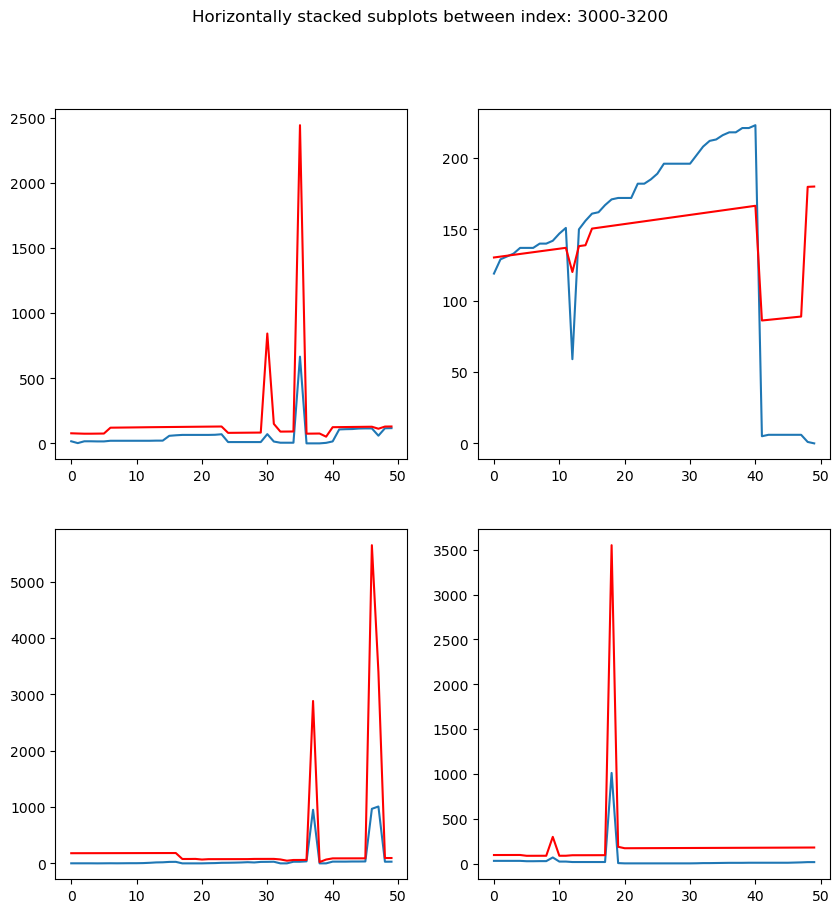

In [27]:
analyze_pred.plot_pred_vs_orig(3000,50,Y_waittimedata,y_pred25_sept.ravel())

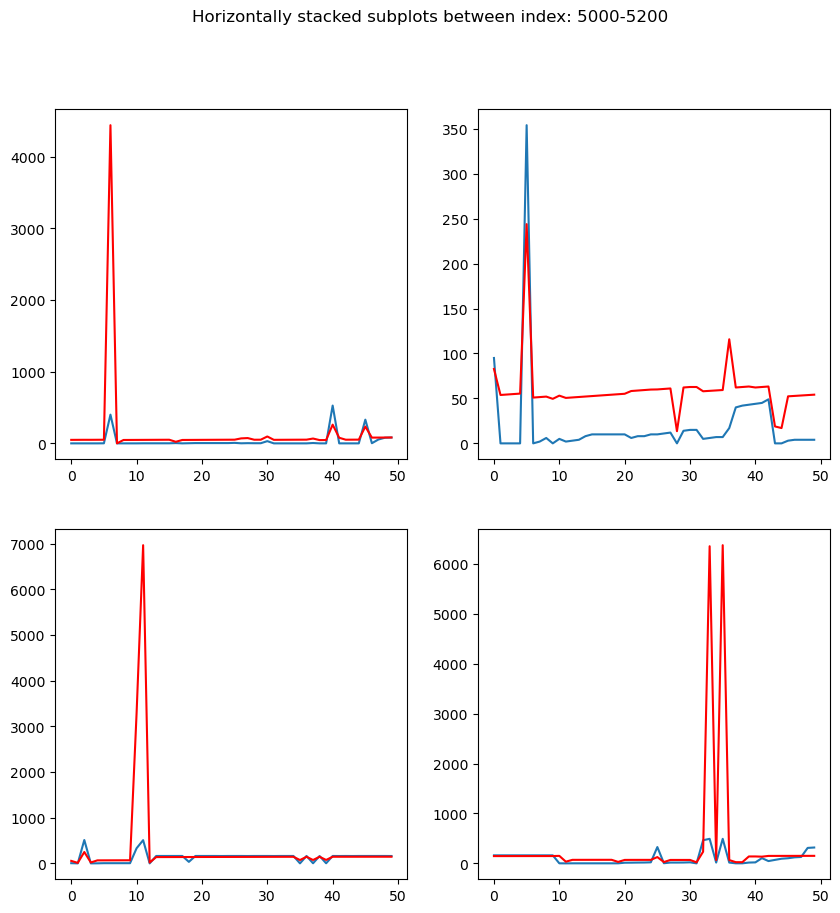

In [28]:
analyze_pred.plot_pred_vs_orig(5000,50,Y_waittimedata,y_pred25_sept.ravel())